# Image Enhancement

### Step 1: Importing Libraries

In [351]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Step 2: Load and Display Sample Image. Here we try to load two copies of the same image, with help of numpy library, concatenate them to form an ndarray

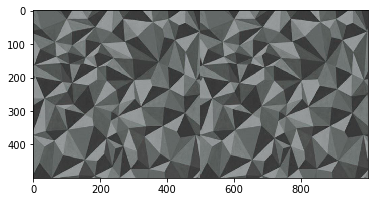

In [352]:
img1=cv2.imread('photo.jpg')
img2=cv2.imread('photo2.jpg')
combined_imgage=np.concatenate((img1,img2), axis=1)
plt.imshow(combined_imgage)

### Applying Power-Law (Gamma) Transformation 

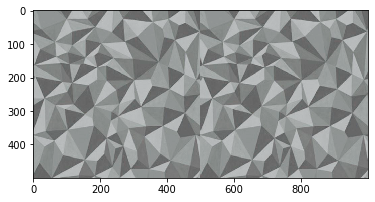

In [376]:
gamma_corrected = np.array(255*(combined_imgage / 255)**0.6, dtype = 'uint8')
plt.imshow(gamma_corrected)

### Step 3: Convert Image to GrayScale Image. 

### Meaning that for each pixel, we transform the pixel values to get the grayscale value. 

In [377]:
grayscale_img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayscale_img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

### Step 4: compute a grayscale histogram & Plot  the histogram of the GrayScale Intensity Distribution

### the function calcHist() consists of parameters such as :                                                                                                1.) images- this is simply the image we want to compute its histogram                                                                              2.) channels- it comprises of list of indexes, where we can specify the index of channel to compute its histogram,    [0] in the channel is basically for grayscale image whereas                                                                                                 [0,1,2] are used for RGB.  3.) mask-  None is used when we do not provide masking. 4.) histSize- the number of bins to be used in the histogram.  5.) ranges- range of pixel values.

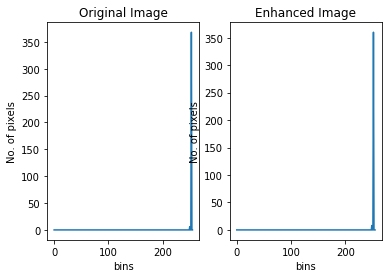

In [378]:
hist1=cv2.calcHist(grayscale_img1, [0], None, [256], [0, 256])
hist2=cv2.calcHist(grayscale_img2, [0], None, [256], [0, 256])
plt.subplot(121)
plt.title('Original Image')
plt.xlabel('bins')
plt.ylabel('No. of pixels')

plt.plot(histogram_img1)
plt.subplot(122)
plt.title('Enhanced Image')
plt.xlabel('bins')
plt.ylabel('No. of pixels')
plt.plot(histogram_img2)
plt.show()

### Step 5: Boosting the global contrast of an image to make it look more visible. Now we will use cv2.equalizeHist() function with the purpose of equalizing the contrast of a given grayscale image.cv2.equalizeHist() function normalises the brightness and also increases the contrast.

### Equalization helps us to map one histogram distribution to another histogram distribution in order to uniformly distribute the values of the image we are enhancing so that it can  spread over the whole range.

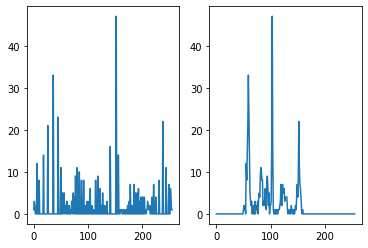

In [379]:
gray_img_eqhist=cv2.equalizeHist(grayscale_img1)
gray_img1_eqhist=cv2.equalizeHist(grayscale_img2)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1_eqhist,[0],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist1)
plt.subplot(122)
plt.plot(hist2)
plt.show()

### Step 6: Display the Grayscale Histogram equalized images

### Here, we plot the equalized grayscale histogram of the two combined for visaulization

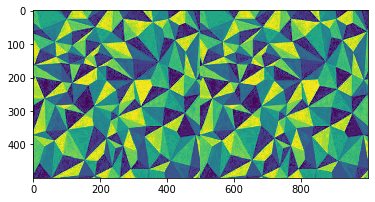

In [382]:
gray_hist_equalize_new=np.concatenate((gray_img_eqhist,gray_img1_eqhist),axis=1)
plt.imshow(gray_hist_equalize_new)

### Step 7 :Contrast Limited Adaptive Histogram Equalization

#### Applying CLAHE here typically helps in enhancing the contrast of the image with the parameter clipLimit and tileGridSize set.   clipLimit – by setting the threshold for contrast limit with a default value of 40.   tileGridSize – here number of tiles in the row and column are set with default value of 8x8.


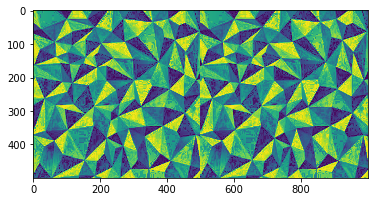

In [384]:
clahe_img=cv2.createCLAHE(clipLimit=40,  tileGridSize=(8,8))
gray_img_clahe1=clahe_img.apply(gray_img_eqhist)
gray_img_clahe2=clahe_img.apply(gray_img1_eqhist)
images_new=np.concatenate((gray_img_clahe1,gray_img_clahe2),axis=1)
plt.imshow(images_new)

### Step 8:Thresholding Techniques

### Here, we apply the segmentation to the grayscale image using 6 different thresholding techniques:  
1. Threshold Binary
2. Threshold Binary, Inverted
3. Thresholding to Zero
4. Threshold to zero, Inverted
5. Thresholding Truncate
6. Otsu Thresholding

parameters in the thresholding are as follow:
gray_img_clahe: grayscale image data
th: threshold value ranging from 0 to 255
max_val: value to apply on the threshold, 255=white
where THRESH_BINARY,THRESH_BINARY_INV,THRESH_TOZERO,THRESH_TOZERO_INV,
THRESH_TRUNC,THRESH_OTSU are the object types for the threshold.
The segmentation is grouped as o1,o2,o3 for the first image, and 
The segmentation is grouped as o4,o5,o6 for the second image
  

In [385]:
th=160
max_val=190
ret, o1 = cv2.threshold(gray_img_clahe1, th, max_val, cv2.THRESH_BINARY)
cv2.putText(o1,"Thresh_Binary",(5,10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o2 = cv2.threshold(gray_img_clahe1, th, max_val, cv2.THRESH_BINARY_INV)
cv2.putText(o2,"Thresh_Binary_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o3 = cv2.threshold(gray_img_clahe1, th, max_val, cv2.THRESH_TOZERO)
cv2.putText(o3,"Thresh_Tozero",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o4 = cv2.threshold(gray_img_clahe1, th, max_val, cv2.THRESH_TOZERO_INV)
cv2.putText(o4,"Thresh_Tozero_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o5 = cv2.threshold(gray_img_clahe1, th, max_val, cv2.THRESH_TRUNC)
cv2.putText(o5,"Thresh_trunc",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret ,o6=  cv2.threshold(gray_img_clahe1, th, max_val,  cv2.THRESH_OTSU)
cv2.putText(o6,"Thresh_OSTU",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)

final1=np.concatenate((o1,o2,o3),axis=1)
final2=np.concatenate((o4,o5,o6),axis=1)
cv2.imwrite("first_image.jpg",final1)
cv2.imwrite("second_image.jpg",final2)

True

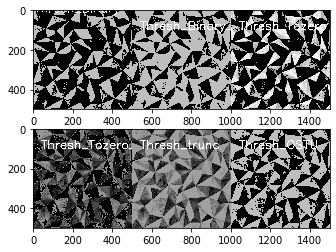

In [386]:
plt.subplot(211)
plt.imshow(final1, cmap="gray")
plt.subplot(212)
plt.imshow(final2, cmap="gray")
plt.show()

### Step 9: Adaptive Thresholding

### This is another method of segmentation. Here we're changing the threshold value dynamically over the image with help of adaptive thresholding technique.

In [387]:
gray_image = cv2.imread('photo.jpg',0)
gray_image2 = cv2.imread('photo2.jpg',0)
thresh1 = cv2.adaptiveThreshold(gray_image, 190, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)
thresh11 = cv2.adaptiveThreshold(gray_image2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh21 = cv2.adaptiveThreshold(gray_image2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 5)
thresh31 = cv2.adaptiveThreshold(gray_image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,5 )
thresh41 = cv2.adaptiveThreshold(gray_image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 5)

final1=np.concatenate((thresh1,thresh2,thresh3,thresh4),axis=1)
final2=np.concatenate((thresh11,thresh21,thresh31,thresh41),axis=1)

cv2.imwrite('rect.jpg',final1)
cv2.imwrite('rect1.jpg',final2)

True

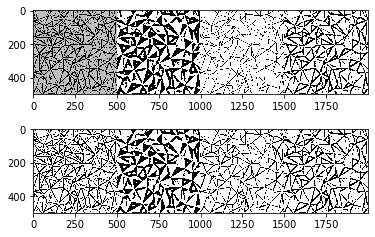

In [388]:
plt.subplot(211)
plt.imshow(final1, cmap="gray")
plt.subplot(212)
plt.imshow(final2, cmap="gray")
plt.show()

### Step 10: OTSU Binarization

### Fixing of pixels to obtain binary images from grayscale images is determined automatically using otsu binaarization. Here, we try to reduce the intensity values if it's more than the threshold.


In [389]:
gray_image = cv2.imread('photo.jpg',0)
gray_image2= cv2.imread('photo2.jpg',0)
ret,thresh1 = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(gray_image2,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite('rect.jpg',np.concatenate((thresh1,thresh2),axis=1))

True

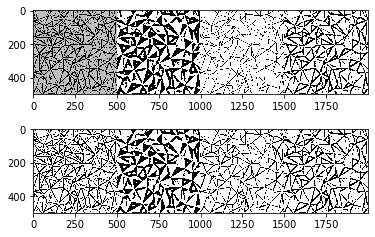

In [390]:
plt.subplot(211)
plt.imshow(final1, cmap="gray")
plt.subplot(212)
plt.imshow(final2, cmap="gray")
plt.show()

## CONCLUSION: In nutshell, our goal towards image enhancement is simply to improve its quality after applying all the possible procedures and techniques possible. Therefore, we have transformed our original image into new look of the same image with  the help of the enhancement techniques explained above.